In [70]:
import torch
import torch.nn as nn
import torch.functional as f
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split

In [71]:
transform=transforms.Compose([
    transforms.Resize((244,244)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
])

In [72]:
dataset=datasets.ImageFolder(root="C:\\Users\\anish\\Downloads\\archive\\PetImages",transform=transform)

In [73]:
train_size=(len(dataset)//10)*8
val_size=(len(dataset)//10)
test_size=len(dataset)-train_size-val_size

In [74]:
train_data,val_data,test_data=random_split(dataset,[train_size,val_size,test_size])

In [75]:
train_loader=DataLoader(train_data,batch_size=32,shuffle=True,num_workers=2)
val_loader=DataLoader(val_data,batch_size=32,shuffle=False,num_workers=2)
test_loader=DataLoader(test_data,batch_size=32,shuffle=False,num_workers=2)

In [76]:
torch.manual_seed(41)
model=nn.Sequential()

In [77]:
conv1=nn.Conv2d(in_channels=3, out_channels=16,kernel_size=3,padding=1)
bn1=nn.BatchNorm2d(16)
relu1=nn.ReLU()
maxpool1=nn.MaxPool2d(kernel_size=3,stride=2)

In [78]:
conv2=nn.Conv2d(in_channels=16, out_channels=32,kernel_size=3,padding=1)
bn2=nn.BatchNorm2d(32)
relu2=nn.ReLU()
maxpool2=nn.MaxPool2d(kernel_size=3,stride=2)

In [79]:
conv3=nn.Conv2d(in_channels=32, out_channels=64,kernel_size=3,padding=1)
bn3=nn.BatchNorm2d(64)
relu3=nn.ReLU()
maxpool3=nn.MaxPool2d(kernel_size=2,stride=2)

In [80]:
conv4=nn.Conv2d(in_channels=64, out_channels=128,kernel_size=3,padding=1)
bn4=nn.BatchNorm2d(128)
relu4=nn.ReLU()
maxpool4=nn.MaxPool2d(kernel_size=2,stride=2)

In [81]:
conv5=nn.Conv2d(in_channels=128, out_channels=256,kernel_size=3,padding=1)
bn5=nn.BatchNorm2d(256)
relu5=nn.ReLU()
maxpool5=nn.MaxPool2d(kernel_size=2,stride=2)

In [82]:
conv5_2=nn.Conv2d(in_channels=256, out_channels=384,kernel_size=3,padding=1)
bn5_2=nn.BatchNorm2d(384)
relu5_2=nn.ReLU()
maxpool5_2=nn.AdaptiveAvgPool2d((1,1))

In [83]:
drop1=nn.Dropout()
flatten=nn.Flatten()
l1=nn.Linear(in_features=384,out_features=512)
bn6=nn.BatchNorm1d(512)
relu6=nn.ReLU()
drop2=nn.Dropout()
l2=nn.Linear(in_features=512,out_features=256)
bn7=nn.BatchNorm1d(256)
relu7=nn.ReLU()
drop3=nn.Dropout()
l3=nn.Linear(in_features=256,out_features=128)
bn8=nn.BatchNorm1d(128)
relu8=nn.ReLU()
drop4=nn.Dropout()
l4=nn.Linear(in_features=128,out_features=30)
bn9=nn.BatchNorm1d(30)
relu9=nn.ReLU()
out=nn.Linear(in_features=30,out_features=3)

In [84]:
model.append(conv1)
model.append(bn1)
model.append(relu1)
model.append(maxpool1)
model.append(conv2)
model.append(bn2)
model.append(relu2)
model.append(maxpool2)
model.append(conv3)
model.append(bn3)
model.append(relu3)
model.append(maxpool3)
model.append(conv4)
model.append(bn4)
model.append(relu4)
model.append(maxpool4)
model.append(conv5)
model.append(bn5)
model.append(relu5)
model.append(maxpool5)
model.append(conv5_2)
model.append(bn5_2)
model.append(relu5_2)
model.append(maxpool5_2)
model.append(drop1)
model.append(flatten)
model.append(l1)
model.append(bn6)
model.append(relu6)
model.append(drop2)
model.append(l2)
model.append(bn7)
model.append(relu7)
model.append(drop3)
model.append(l3)
model.append(bn8)
model.append(relu8)
model.append(drop4)
model.append(l4)
model.append(bn9)
model.append(relu9)
model.append(out)

Sequential(
  (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (4): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): ReLU()
  (7): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (8): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (10): ReLU()
  (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (12): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (14): ReLU()
  (15): MaxPool2d(kernel_size=2, stride=

In [85]:
import numpy as np

In [86]:
from tqdm import tqdm

In [87]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

In [88]:
losses=[]
val_losses=[]
train_accuracies=[]
val_accuracies=[]

In [ ]:
best_val_loss = float('inf')
patience = 5
counter = 0

for epoch in tqdm(range(20)):
    print(f"Epoch {epoch}:\n")
 
    model.train()
    epoch_losses=[]
    correct_train = 0
    total_train = 0
    
    for images,labels in train_loader:
        optimizer.zero_grad()
        outputs=model(images)
        loss=loss_fn(outputs,labels)
        epoch_losses.append(loss.item())
        loss.backward()
        optimizer.step()
        
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
    
    train_loss = np.mean(epoch_losses)
    train_accuracy = 100 * correct_train / total_train
    print(f"Train loss: {train_loss:.4f}, Train accuracy: {train_accuracy:.2f}%\n")

    model.eval()
    epoch_val_losses=[]
    correct_val = 0
    total_val = 0
    
    with torch.no_grad():
        for val_images,val_labels in val_loader:
            val_outputs=model(val_images)
            val_loss=loss_fn(val_outputs,val_labels)
            epoch_val_losses.append(val_loss.item())
            
            _, predicted = torch.max(val_outputs.data, 1)
            total_val += val_labels.size(0)
            correct_val += (predicted == val_labels).sum().item()
    
    val_loss = np.mean(epoch_val_losses)
    val_accuracy = 100 * correct_val / total_val
    print(f"Val loss: {val_loss:.4f}, Val accuracy: {val_accuracy:.2f}%")
    
    # Store metrics
    losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    scheduler.step()  

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        counter = 0
        torch.save(model.state_dict(), 'models/3/best_model.pth')
    else:
        counter += 1
        print(f"No improvement in validation loss for {counter} epoch(s).")
        if counter >= patience:
            print("Early stopping triggered.")
            break

Testing: 100%|██████████| 79/79 [02:27<00:00,  1.87s/it]



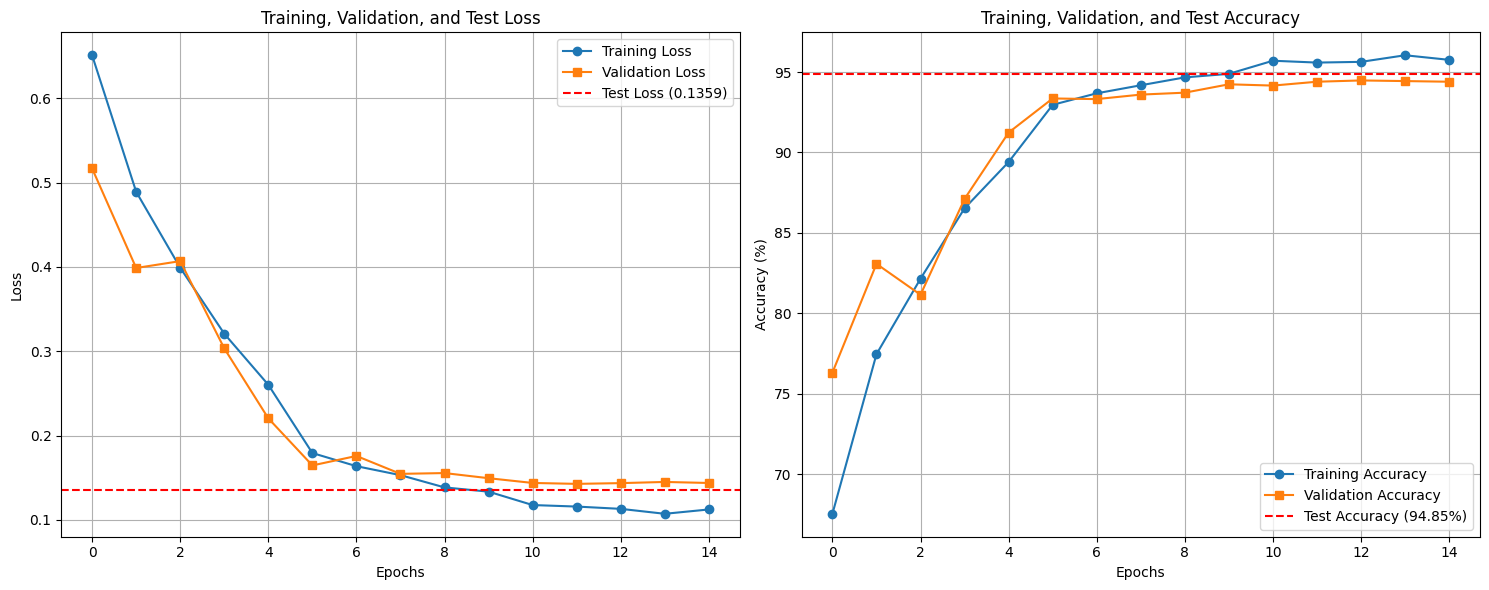


Final Results:
Train - Loss: 0.1124, Accuracy: 95.76%
Validation - Loss: 0.1438, Accuracy: 94.40%
Test - Loss: 0.1359, Accuracy: 94.85%


In [90]:
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.load_state_dict(torch.load('models/3/best_model.pth'))
model.to(device)
model.eval()

correct_test = 0
total_test = 0
test_loss_total = 0

with torch.no_grad():
    for test_images, test_labels in tqdm(test_loader, desc="Testing"):
        test_images, test_labels = test_images.to(device), test_labels.to(device)
        test_outputs = model(test_images)
        test_loss = loss_fn(test_outputs, test_labels)
        test_loss_total += test_loss.item()
        
        _, predicted = torch.max(test_outputs.data, 1)
        total_test += test_labels.size(0)
        correct_test += (predicted == test_labels).sum().item()

final_test_loss = test_loss_total / len(test_loader)
test_accuracy = 100 * correct_test / total_test

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.plot(range(len(losses)), losses, label='Training Loss', marker='o')
ax1.plot(range(len(val_losses)), val_losses, label='Validation Loss', marker='s')
ax1.axhline(y=final_test_loss, color='red', linestyle='--', label=f'Test Loss ({final_test_loss:.4f})')
ax1.set_title('Training, Validation, and Test Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()
ax1.grid(True)

ax2.plot(range(len(train_accuracies)), train_accuracies, label='Training Accuracy', marker='o')
ax2.plot(range(len(val_accuracies)), val_accuracies, label='Validation Accuracy', marker='s')
ax2.axhline(y=test_accuracy, color='red', linestyle='--', label=f'Test Accuracy ({test_accuracy:.2f}%)')
ax2.set_title('Training, Validation, and Test Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy (%)')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

print(f"\nFinal Results:")
print(f"Train - Loss: {losses[-1]:.4f}, Accuracy: {train_accuracies[-1]:.2f}%")
print(f"Validation - Loss: {val_losses[-1]:.4f}, Accuracy: {val_accuracies[-1]:.2f}%")
print(f"Test - Loss: {final_test_loss:.4f}, Accuracy: {test_accuracy:.2f}%")

In [91]:
import os

os.makedirs('models', exist_ok=True)
torch.save(model, 'models/3/cat_dog_classifier.pth')


training_data = {
    'losses': losses,
    'val_losses': val_losses,
    'train_accuracies': train_accuracies,
    'val_accuracies': val_accuracies,
    'final_test_loss': final_test_loss,
    'test_accuracy': test_accuracy
}
torch.save(training_data, 'models/3/training_metrics.pth')


In [92]:

loaded_model = torch.load('models/cat_dog_classifier_2.pth',weights_only=False)
loaded_model.eval()  
loaded_model.to("cpu")


Sequential(
  (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (4): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): ReLU()
  (7): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (8): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (10): ReLU()
  (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (12): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (14): ReLU()
  (15): MaxPool2d(kernel_size=2, stride=

In [93]:
classesMap={
    0:"Cat",
    1:"Dog"
}

In [94]:
from PIL import Image


In [100]:
path="9973.jpg"
img=Image.open(path)
imgTensor=transform(img)
imgTensor=imgTensor.unsqueeze(0)

with torch.no_grad():
    output=loaded_model(imgTensor)
    
_,pred=torch.max(output.data,1)
print(classesMap[pred.item()])


Cat
